In [1]:
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from azure.cognitiveservices.vision.computervision.models import OperationStatusCodes
from azure.cognitiveservices.vision.computervision.models import VisualFeatureTypes
from msrest.authentication import CognitiveServicesCredentials

from array import array
import os
from PIL import Image
import sys
import time

## DESCRIBE AN IMAGE

In [2]:
local_image_path = os.path.join(r"C:\Users\jayac\Downloads\AI 100\1_o1pULqAB2NIrNV-Ur12SFg.jpeg")
# <snippet_remoteimage>
remote_image_url = os.path.join(r"C:\Users\jayac\Downloads\AI 100\IMG_20200229_164759.jpg")

In [3]:
subscription_key = "a9626af4d50a495a990e6d557e4c9735"
endpoint = "https://jccognitive.cognitiveservices.azure.com/"

In [4]:
computervision_client = ComputerVisionClient(endpoint, CognitiveServicesCredentials(subscription_key))

In [5]:
print("===== Describe an Image - local =====")
# Open local image file
local_image = open(local_image_path, "rb")

===== Describe an Image - local =====


In [6]:
description_result = computervision_client.describe_image_in_stream(local_image)

In [7]:
if (len(description_result.captions) == 0):
    print("No description detected.")
else:
    for caption in description_result.captions:
        print("'{}' with confidence {:.2f}%".format(caption.text, caption.confidence * 100))

'a group of people playing cricket' with confidence 55.07%


In [8]:
remote_image = open(remote_image_url, "rb")
description_results = computervision_client.describe_image_in_stream(remote_image )

In [9]:
if (len(description_results.captions) == 0):
    print("No description detected.")
else:
    for caption in description_results.captions:
        print("'{}' with confidence {:.2f}%".format(caption.text, caption.confidence * 100))

'a red apple on a white surface' with confidence 60.01%


## CATEGORIZE AN IMAGE

In [10]:
local_image_path = os.path.join(r"C:\Users\jayac\Downloads\AI 100\1_o1pULqAB2NIrNV-Ur12SFg.jpeg")
local_image = open(local_image_path, "rb")

In [11]:
local_image_features = ["categories"]

In [12]:
categorize_results_local = computervision_client.analyze_image_in_stream(local_image, local_image_features)

In [13]:
print("Categories from local image: ")
if (len(categorize_results_local.categories) == 0):
    print("No categories detected.")
else:
    for category in categorize_results_local.categories:
        print("'{}' with confidence {:.2f}%".format(category.name, category.score * 100))
print()

Categories from local image: 
'outdoor_' with confidence 0.78%
'trans_bicycle' with confidence 85.55%



## TAG AN IMAGE

In [14]:
local_image_path = os.path.join(r"C:\Users\jayac\Downloads\AI 100\IMG_20200229_164759.jpg")
local_image = open(local_image_path, "rb")

In [15]:
tags_result_local = computervision_client.tag_image_in_stream(local_image)

In [16]:
if (len(tags_result_local.tags) == 0):
    print("No tags detected.")
else:
    for tag in tags_result_local.tags:
        print("'{}' with confidence {:.2f}%".format(tag.name, tag.confidence * 100))

'apple' with confidence 98.89%
'sitting' with confidence 97.39%
'fruit' with confidence 96.98%
'indoor' with confidence 94.32%
'food' with confidence 81.87%
'natural foods' with confidence 75.42%
'mcintosh' with confidence 72.05%
'diet food' with confidence 69.29%
'superfood' with confidence 63.13%
'accessory fruit' with confidence 60.38%
'peach' with confidence 53.00%
'orange' with confidence 48.05%


In [17]:
remote_image_url = "https://img.freepik.com/free-vector/pupils-study-classroom-interior-pupils-school-lesson-vector-illustration_53562-8013.jpg?size=626&ext=jpg"


In [18]:
tags_result_remote = computervision_client.tag_image(remote_image_url )

In [19]:
print("Tags in the remote image: ")
if (len(tags_result_remote.tags) == 0):
    print("No tags detected.")
else:
    for tag in tags_result_remote.tags:
        print("'{}' with confidence {:.2f}%".format(tag.name, tag.confidence * 100))

Tags in the remote image: 
'indoor' with confidence 99.72%
'ceiling' with confidence 99.14%
'table' with confidence 98.52%
'floor' with confidence 97.08%
'wall' with confidence 96.91%
'cartoon' with confidence 95.37%
'room' with confidence 88.04%
'chair' with confidence 84.57%
'text' with confidence 65.87%
'person' with confidence 64.78%
'child art' with confidence 53.21%
'area' with confidence 42.14%
'furniture' with confidence 32.40%
'island' with confidence 16.28%
'conference room' with confidence 11.29%
'desk' with confidence 9.26%


## DETECT FACE

In [20]:
local_image_path = os.path.join(r"C:\Users\jayac\Downloads\AI 100\OIP.jfif")
local_image = open(local_image_path, "rb")

In [21]:
local_image_features = ["faces"]
detect_faces_results_local = computervision_client.analyze_image_in_stream(local_image, local_image_features)

In [22]:
if (len(detect_faces_results_local.faces) == 0):
    print("No faces detected.")
else:
    for face in detect_faces_results_local.faces:
        print("'{}' of age {} at location {}, {}, {}, {}".format(face.gender, face.age, \
        face.face_rectangle.left, face.face_rectangle.top, \
        face.face_rectangle.left + face.face_rectangle.width, \
        face.face_rectangle.top + face.face_rectangle.height))

'Male' of age 33 at location 141, 49, 203, 111


In [23]:
print("===== Detect Faces - remote =====")
# Get an image with faces
remote_image_url_faces = "https://raw.githubusercontent.com/Azure-Samples/cognitive-services-sample-data-files/master/ComputerVision/Images/faces.jpg"
# Select the visual feature(s) you want.
remote_image_features = ["faces"]
# Call the API with remote URL and features
detect_faces_results_remote = computervision_client.analyze_image(remote_image_url_faces, remote_image_features)

# Print the results with gender, age, and bounding box
print("Faces in the remote image: ")
if (len(detect_faces_results_remote.faces) == 0):
    print("No faces detected.")
else:
    for face in detect_faces_results_remote.faces:
        print("'{}' of age {} at location {}, {}, {}, {}".format(face.gender, face.age, \
        face.face_rectangle.left, face.face_rectangle.top, \
        face.face_rectangle.left + face.face_rectangle.width, \
        face.face_rectangle.top + face.face_rectangle.height))

===== Detect Faces - remote =====
Faces in the remote image: 
'Male' of age 39 at location 118, 159, 212, 253
'Male' of age 54 at location 492, 111, 582, 201
'Female' of age 55 at location 18, 153, 102, 237
'Female' of age 33 at location 386, 166, 467, 247
'Female' of age 18 at location 235, 158, 311, 234
'Female' of age 8 at location 323, 163, 391, 231


## Adult or Racy Content 

In [24]:
local_image_path = os.path.join(r"C:\Users\jayac\Downloads\AI 100\scolding-6.jpg")
local_image = open(local_image_path, "rb")

In [25]:
local_image_features = ["adult"]
detect_adult_results_local = computervision_client.analyze_image_in_stream(local_image, local_image_features)


In [26]:

print("Analyzing local image for adult or racy content ... ")
print("Is adult content: {} with confidence {:.2f}".format(detect_adult_results_local .adult.is_adult_content, detect_adult_results_local .adult.adult_score * 100))
print("Has racy content: {} with confidence {:.2f}".format(detect_adult_results_local .adult.is_racy_content, detect_adult_results_local .adult.racy_score * 100))

Analyzing local image for adult or racy content ... 
Is adult content: False with confidence 4.04
Has racy content: False with confidence 4.46


In [27]:
print("===== Detect Adult or Racy Content - remote =====")
# Select the visual feature(s) you want
remote_image_url="https://th.bing.com/th/id/OIP.7Sj95KpLZBIEdu3IsgY_WQAAAA?w=300&h=153&c=7&o=5&dpr=1.25&pid=1.7"
remote_image_features = ["adult"]
# Call API with URL and features
detect_adult_results_remote = computervision_client.analyze_image(remote_image_url, remote_image_features)

# Print results with adult/racy score
print("Analyzing remote image for adult or racy content ... ")
print("Is adult content: {} with confidence {:.2f}".format(detect_adult_results_remote.adult.is_adult_content, detect_adult_results_remote.adult.adult_score * 100))
print("Has racy content: {} with confidence {:.2f}".format(detect_adult_results_remote.adult.is_racy_content, detect_adult_results_remote.adult.racy_score * 100))
# </snippet_adult>
print()

===== Detect Adult or Racy Content - remote =====
Analyzing remote image for adult or racy content ... 
Is adult content: False with confidence 0.78
Has racy content: False with confidence 0.98



## Detect Color

In [28]:
local_image_path = os.path.join(r"C:\Users\jayac\Downloads\AI 100\Playground-WikiC-Post.jpg")
local_image = open(local_image_path, "rb")

In [29]:
local_image_features = ["color"]
detect_color_results_local = computervision_client.analyze_image_in_stream(local_image, local_image_features)

In [30]:
print("Getting color scheme of the local image: ")
print("Is black and white: {}".format(detect_color_results_local.color.is_bw_img))
print("Accent color: {}".format(detect_color_results_local.color.accent_color))
print("Dominant background color: {}".format(detect_color_results_local.color.dominant_color_background))
print("Dominant foreground color: {}".format(detect_color_results_local.color.dominant_color_foreground))
print("Dominant colors: {}".format(detect_color_results_local.color.dominant_colors))

Getting color scheme of the local image: 
Is black and white: False
Accent color: BA8411
Dominant background color: Grey
Dominant foreground color: Grey
Dominant colors: ['Grey']


In [31]:
##Remote URL
remote_image_url_faces = "https://raw.githubusercontent.com/Azure-Samples/cognitive-services-sample-data-files/master/ComputerVision/Images/faces.jpg"

print("===== Detect Color - remote =====")
# Select the feature(s) you want
remote_image_features = ["color"]
# Call API with URL and features
detect_color_results_remote = computervision_client.analyze_image(remote_image_url, remote_image_features)

# Print results of color scheme
print("Getting color scheme of the remote image: ")
print("Is black and white: {}".format(detect_color_results_remote.color.is_bw_img))
print("Accent color: {}".format(detect_color_results_remote.color.accent_color))
print("Dominant background color: {}".format(detect_color_results_remote.color.dominant_color_background))
print("Dominant foreground color: {}".format(detect_color_results_remote.color.dominant_color_foreground))
print("Dominant colors: {}".format(detect_color_results_remote.color.dominant_colors))

===== Detect Color - remote =====
Getting color scheme of the remote image: 
Is black and white: False
Accent color: A2292E
Dominant background color: White
Dominant foreground color: White
Dominant colors: ['White']


## Detect Famous personality

In [32]:
local_image_path = os.path.join(r"C:\Users\jayac\Downloads\AI 100\jeff.jfif")
local_image = open(local_image_path, "rb")

In [33]:
detect_domain_results_celebs_local = computervision_client.analyze_image_by_domain_in_stream("celebrities", local_image)


In [34]:
print("Celebrities in the local image:")
if len(detect_domain_results_celebs_local.result["celebrities"]) == 0:
    print("No celebrities detected.")
else:
    for celeb in detect_domain_results_celebs_local.result["celebrities"]:
        print(celeb["name"])

Celebrities in the local image:
Jeff Bezos


In [35]:
## Using URL
print("===== Detect Domain-specific Content - remote =====")
# URL of one or more celebrities
remote_image_url_celebs = "https://raw.githubusercontent.com/Azure-Samples/cognitive-services-sample-data-files/master/ComputerVision/Images/faces.jpg"
# Call API with content type (celebrities) and URL
detect_domain_results_celebs_remote = computervision_client.analyze_image_by_domain("celebrities", remote_image_url_celebs)

# Print detection results with name
print("Celebrities in the remote image:")
if len(detect_domain_results_celebs_remote.result["celebrities"]) == 0:
    print("No celebrities detected.")
else:
    for celeb in detect_domain_results_celebs_remote.result["celebrities"]:
        print(celeb["name"])

===== Detect Domain-specific Content - remote =====
Celebrities in the remote image:
Bern Collaco


## Detect Landmarks

In [36]:
local_image_path = os.path.join(r"C:\Users\jayac\Downloads\AI 100\Eiffel-Tower-view-Paris.jpg")
local_image_landmark = open(local_image_path, "rb")

In [37]:
detect_domain_results_landmark_local = computervision_client.analyze_image_by_domain_in_stream("landmarks", local_image_landmark)


In [38]:
print("Landmarks in the local image:")
if len(detect_domain_results_landmark_local.result["landmarks"]) == 0:
    print("No landmarks detected.")
else:
    for landmark in detect_domain_results_landmark_local.result["landmarks"]:
        print(landmark["name"])

Landmarks in the local image:
Eiffel Tower


In [39]:
remote_image_url="https://th.bing.com/th/id/OIP.gM4rJpH5YAcKHP4JF9O1WAHaFj?pid=Api&rs=1"
detect_domain_results_landmarks = computervision_client.analyze_image_by_domain("landmarks", remote_image_url)
print()

print("Landmarks in the remote image:")
if len(detect_domain_results_landmarks.result["landmarks"]) == 0:
    print("No landmarks detected.")
else:
    for landmark in detect_domain_results_landmarks.result["landmarks"]:
        print(landmark["name"])


Landmarks in the remote image:
Taj Mahal


## Analyze whether a Clip Art or line draw

In [40]:
local_image_path = os.path.join(r"C:\Users\jayac\Downloads\AI 100\art.jfif")
local_image_type = open(local_image_path, "rb")

In [41]:
local_image_features = [VisualFeatureTypes.image_type]
detect_type_results_local = computervision_client.analyze_image_in_stream(local_image_type, local_image_features)

In [42]:
print("Type of local image:")
if detect_type_results_local.image_type.clip_art_type == 0:
    print("Image is not clip art.")
elif detect_type_results_local.image_type.line_drawing_type == 1:
    print("Image is ambiguously clip art.")
elif detect_type_results_local.image_type.line_drawing_type == 2:
    print("Image is normal clip art.")
else:
    print("Image is good clip art.")

if detect_type_results_local.image_type.line_drawing_type == 0:
    print("Image is not a line drawing.")
else:
    print("Image is a line drawing")

Type of local image:
Image is not clip art.
Image is not a line drawing.


In [43]:
remote_image_url_type = "https://th.bing.com/th/id/OIP.OMu3jolGatFWD_egzgloLQHaJB?w=206&h=251&c=7&o=5&dpr=1.25&pid=1.7"
# Select visual feature(s) you want
remote_image_features = [VisualFeatureTypes.image_type]
# Call API with URL and features
detect_type_results_remote = computervision_client.analyze_image(remote_image_url_type, remote_image_features)

# Prints type results with degree of accuracy
print("Type of remote image:")
if detect_type_results_remote.image_type.clip_art_type == 0:
    print("Image is not clip art.")
elif detect_type_results_remote.image_type.line_drawing_type == 1:
    print("Image is ambiguously clip art.")
elif detect_type_results_remote.image_type.line_drawing_type == 2:
    print("Image is normal clip art.")
else:
    print("Image is good clip art.")

if detect_type_results_remote.image_type.line_drawing_type == 0:
    print("Image is not a line drawing.")
else:
    print("Image is a line drawing")

Type of remote image:
Image is ambiguously clip art.
Image is a line drawing


## Detecting Objects with Boudning box

In [44]:
print("===== Detect Objects - remote =====")
# Get URL image with different objects
remote_image_url_objects = "https://raw.githubusercontent.com/Azure-Samples/cognitive-services-sample-data-files/master/ComputerVision/Images/objects.jpg"
# Call API with URL
detect_objects_results_remote = computervision_client.detect_objects(remote_image_url_objects)

# Print detected objects results with bounding boxes
print("Detecting objects in remote image:")
if len(detect_objects_results_remote.objects) == 0:
    print("No objects detected.")
else:
    for object in detect_objects_results_remote.objects:
        print("object at location {}, {}, {}, {}".format( \
        object.rectangle.x, object.rectangle.x + object.rectangle.w, \
        object.rectangle.y, object.rectangle.y + object.rectangle.h))
# </snippet_objects>
print()

===== Detect Objects - remote =====
Detecting objects in remote image:
object at location 213, 365, 85, 208
object at location 218, 402, 179, 384
object at location 238, 417, 298, 416
object at location 116, 419, 60, 386



## Detecting Brands

In [45]:
print("===== Detect Brands - remote =====")
# Get a URL with a brand logo
remote_image_url = "https://docs.microsoft.com/en-us/azure/cognitive-services/computer-vision/images/gray-shirt-logo.jpg"
# Select the visual feature(s) you want
remote_image_features = ["brands"]
# Call API with URL and features
detect_brands_results_remote = computervision_client.analyze_image(remote_image_url, remote_image_features)

print("Detecting brands in remote image: ")
if len(detect_brands_results_remote.brands) == 0:
    print("No brands detected.")
else:
    for brand in detect_brands_results_remote.brands:
        print("'{}' brand detected with confidence {:.1f}% at location {}, {}, {}, {}".format( \
        brand.name, brand.confidence * 100, brand.rectangle.x, brand.rectangle.x + brand.rectangle.w, \
        brand.rectangle.y, brand.rectangle.y + brand.rectangle.h))

===== Detect Brands - remote =====
Detecting brands in remote image: 
'Microsoft' brand detected with confidence 62.5% at location 58, 113, 106, 152
'Microsoft' brand detected with confidence 69.8% at location 58, 260, 86, 149


## Generate ThumbNail

In [46]:
import matplotlib.pyplot as plt
remote_image_url_thumb = "https://raw.githubusercontent.com/Azure-Samples/cognitive-services-sample-data-files/master/ComputerVision/Images/faces.jpg"

print("Generating thumbnail from a URL image...")
# Returns a Generator object, a thumbnail image binary (list).
thumb_remote = computervision_client.generate_thumbnail(
    100, 100, remote_image_url_thumb, True)
# Write the image binary to file
with open("thumb_remote.png", "wb") as f:
    for chunk in thumb_remote:
        f.write(chunk)

print("Thumbnail saved to local folder.")

Generating thumbnail from a URL image...
Thumbnail saved to local folder.


## Extract text from Handwriting

In [47]:
print("===== Batch Read File - remote =====")
# Get an image with handwritten text
remote_image_handw_text_url = "https://handwritingrepair.info/WHAC/Winners2019/AdultCursive1.JPG"

# Call API with URL and raw response (allows you to get the operation location)
recognize_handw_results = computervision_client.read(remote_image_handw_text_url,  raw=True)
# </snippet_read_call>

# <snippet_read_response>
# Get the operation location (URL with an ID at the end) from the response
operation_location_remote = recognize_handw_results.headers["Operation-Location"]
# Grab the ID from the URL
operation_id = operation_location_remote.split("/")[-1]

# Call the "GET" API and wait for it to retrieve the results 
while True:
    get_handw_text_results = computervision_client.get_read_result(operation_id)
    if get_handw_text_results.status not in ['notStarted', 'running']:
        break
    time.sleep(1)

# Print the detected text, line by line
if get_handw_text_results.status == OperationStatusCodes.succeeded:
    for text_result in get_handw_text_results.analyze_result.read_results:
        for line in text_result.lines:
            print(line.text)
            print(line.bounding_box)

===== Batch Read File - remote =====
I_ 1
[2084.0, 10.0, 2339.0, 13.0, 2337.0, 99.0, 2083.0, 94.0]
Handwriting
[938.0, 204.0, 1572.0, 211.0, 1570.0, 342.0, 937.0, 339.0]
That action of emotion, of thought
[647.0, 446.0, 2317.0, 439.0, 2318.0, 540.0, 647.0, 546.0]
land of decision that I has recorded the
[256.0, 566.0, 2179.0, 537.0, 2180.0, 635.0, 257.0, 656.0]
history of mankind, revealed the genius
[259.0, 664.0, 2229.0, 648.0, 2230.0, 751.0, 259.0, 763.0]
of invention, and disclosed the immost
[276.0, 787.0, 2189.0, 755.0, 2190.0, 849.0, 277.0, 876.0]
depths of the soulful heart. It gives
[296.0, 886.0, 2145.0, 859.0, 2146.0, 958.0, 296.0, 980.0]
ideas tangible form through written letters,
[279.0, 994.0, 2320.0, 974.0, 2321.0, 1070.0, 279.0, 1087.0]
Pictographs , symbols and signs .
[275.0, 1108.0, 1765.0, 1091.0, 1766.0, 1187.0, 275.0, 1202.0]
Handwriting forms a bond across
[614.0, 1294.0, 2233.0, 1294.0, 2234.0, 1403.0, 614.0, 1406.0]
millennio and generations that not only
[283

In [48]:
local_image_path = os.path.join(r"C:\Users\jayac\Downloads\AI 100\printed_text.jpg")
local_image_printed_text = open(local_image_path, "rb")

In [49]:
ocr_result_local = computervision_client.recognize_printed_text_in_stream(local_image_printed_text)

In [50]:
for region in ocr_result_local.regions:
    for line in region.lines:
        print("Bounding box: {}".format(line.bounding_box))
        s = ""
        for word in line.words:
            s += word.text + " "
        print(s)

Bounding box: 79,94,1109,81
Nutrition Facts Amount Per Serving 
Bounding box: 220,171,334,51
see: bar (40g) 
Bounding box: 654,205,321,50
Total Fat 13g 
Bounding box: 45,230,473,56
Servng Per Package: 4 
Bounding box: 682,287,433,50
Saturated t 1.5 g 
Bounding box: 11,347,474,50
Amount Per Serving 
Bounding box: 19,436,256,43
alories 190 
Bounding box: 32,517,397,43
ories from Fat 110 
Bounding box: 72,618,394,41
t Daily Values are based 
Bounding box: 673,362,289,53
Trans Fat Og 
Bounding box: 613,438,422,60
Cholesterol Omg 
Bounding box: 598,517,358,53
Sodium 20mq 


In [51]:
print("===== Detect Printed Text with OCR - remote =====")
remote_printed_text_image_url = "https://th.bing.com/th/id/OIP.0E5D0hK8S9Au4trRfsIllgHaFu?pid=Api&rs=1"

ocr_result_remote = computervision_client.recognize_printed_text(remote_printed_text_image_url)
for region in ocr_result_remote.regions:
    for line in region.lines:
        print("Bounding box: {}".format(line.bounding_box))
        s = ""
        for word in line.words:
            s += word.text + " "
        print(s)
print()

===== Detect Printed Text with OCR - remote =====
Bounding box: 37,50,121,40
Directi0Ds: 
Bounding box: 43,105,228,15
How to Get "Here" from "There" 
Bounding box: 93,225,30,9
Imp... 



In [52]:
cog_key = "a9626af4d50a495a990e6d557e4c9735"
cog_endpoint = "https://jccognitive.cognitiveservices.azure.com/"

print('Ready to use cognitive services at {} using key {}'.format(cog_endpoint, cog_key))

Ready to use cognitive services at https://jccognitive.cognitiveservices.azure.com/ using key a9626af4d50a495a990e6d557e4c9735


In [53]:
def show_image_caption():
    import matplotlib.pyplot as plt
   # local_image_path = os.path.join(r"C:\Users\jayac\Downloads\AI 100\1_o1pULqAB2NIrNV-Ur12SFg.jpeg")
    # <snippet_remoteimage>
    remote_image_url = os.path.join(r"C:\Users\jayac\Downloads\AI 100\IMG_20200229_164759.jpg")
    subscription_key = "a9626af4d50a495a990e6d557e4c9735"
    endpoint = "https://jccognitive.cognitiveservices.azure.com/"
    computervision_client = ComputerVisionClient(endpoint, CognitiveServicesCredentials(subscription_key))
    print("===== Describe an Image - local =====")
    local_image = open(local_image_path, "rb")
    description_results = computervision_client.describe_image_in_stream(local_image)
    # Open local image file  
    if (len(description_results.captions) == 0):
        print("No description detected.")
    else:
        for caption in description_results.captions:
            print("'{}' with confidence {:.2f}%".format(caption.text, caption.confidence * 100))
    plt.axis('off')
    plt.imshow(img)


===== Describe an Image - local =====
'text, table' with confidence 65.39%


NameError: name 'img' is not defined

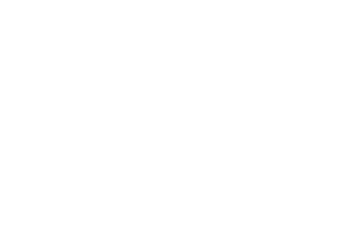

In [54]:
show_image_caption()

Enter the path of the image: C:\Users\jayac\Downloads\AI 100\scolding-6.jpg


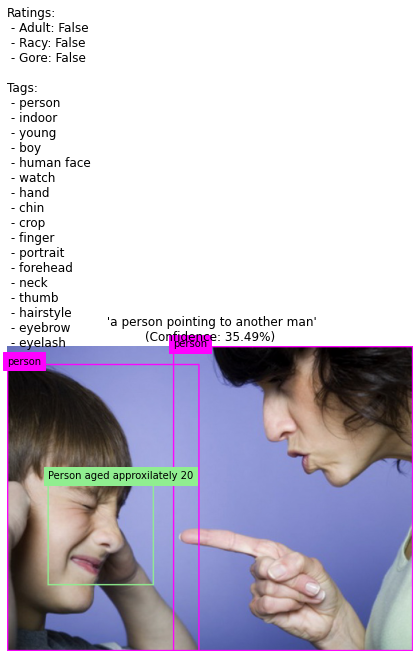

In [55]:
def show_image_analysis(image_path,img_analysis):
    import matplotlib.pyplot as plt
    from PIL import Image, ImageDraw
    import numpy as np

    # Display the image
    fig = plt.figure(figsize=(16, 8))
    a = fig.add_subplot(1,2,1)
    img = Image.open(image_path)
    
    # Get the caption
    caption_text = ''
    if (len(image_analysis.description.captions) == 0):
        caption_text = 'No caption detected'
    else:
        for caption in image_analysis.description.captions:
            caption_text = caption_text + " '{}'\n(Confidence: {:.2f}%)".format(caption.text, caption.confidence * 100)
    plt.title(caption_text)

    # Get objects
    if image_analysis.objects:
        # Draw a rectangle around each object
        for object in image_analysis.objects:
            r = object.rectangle
            bounding_box = ((r.x, r.y), (r.x + r.w, r.y + r.h))
            draw = ImageDraw.Draw(img)
            draw.rectangle(bounding_box, outline='magenta', width=5)
            plt.annotate(object.object_property,(r.x, r.y), backgroundcolor='magenta')

    # Get faces
    if image_analysis.faces:
        # Draw a rectangle around each face
        for face in image_analysis.faces:
            r = face.face_rectangle
            bounding_box = ((r.left, r.top), (r.left + r.width, r.top + r.height))
            draw = ImageDraw.Draw(img)
            draw.rectangle(bounding_box, outline='lightgreen', width=5)
            annotation = 'Person aged approxilately {}'.format(face.age)
            plt.annotate(annotation,(r.left, r.top), backgroundcolor='lightgreen')

    plt.axis('off')
    plt.imshow(img)
    
    ratings = 'Ratings:\n - Adult: {}\n - Racy: {}\n - Gore: {}'.format(image_analysis.adult.is_adult_content,
                                                                           image_analysis.adult.is_racy_content,
                                                                           image_analysis.adult.is_gory_content,)

    # Get tags
    tags = 'Tags:'
    for tag in image_analysis.tags:
        tags = tags + '\n - {}'.format(tag.name)

    # Print details

    details = '{}\n\n{}'.format(ratings, tags)
    a.text(0,0.4, details, fontsize=12)
    plt.axis('off')
    plt.show()
    
if __name__ == '__main__':
    azure_cog_endpoint = 'https://jccognitive.cognitiveservices.azure.com/'
    azure_cog_key = 'a9626af4d50a495a990e6d557e4c9735'
    azure_compvision_client = ComputerVisionClient(azure_cog_endpoint, CognitiveServicesCredentials(azure_cog_key))
    image_path = input("Enter the path of the image: ")
    image_stream = open(image_path, 'rb')
    # image_description = azure_compvision_client.describe_image_in_stream(image_stream)
    # show_image_caption(image_path, image_description)
    features_to_analyse = ['Description', 'Tags', 'Adult', 'Objects', 'Faces','categories']
    image_analysis = azure_compvision_client.analyze_image_in_stream(image_stream, visual_features=features_to_analyse)
    show_image_analysis(image_path, image_analysis)

In [ ]:
def show_image_analysis(image_path,img_analysis):
    import matplotlib.pyplot as plt
    from PIL import Image, ImageDraw
    import numpy as np

    # Display the image
    fig = plt.figure(figsize=(16, 8))
    a = fig.add_subplot(1,2,1)
    img = Image.open(image_path)
    
    # Get the caption
    caption_text = ''
    if (len(image_analysis.description.captions) == 0):
        caption_text = 'No caption detected'
    else:
        for caption in image_analysis.description.captions:
            caption_text = caption_text + " '{}'\n(Confidence: {:.2f}%)".format(caption.text, caption.confidence * 100)
    plt.title(caption_text)
    if image_analysis.objects:
        # Draw a rectangle around each object
        for object in image_analysis.objects:
                r = object.rectangle
                print(r)
                bounding_box = ((r.x, r.y), (r.x + r.w, r.y + r.h))
                print(bounding_box)
                draw = ImageDraw.Draw(img)
                draw.rectangle(bounding_box, outline='magenta', width=5)
                plt.annotate(object.object_property,(r.x, r.y), backgroundcolor='magenta')
                plt.axis('on')
                plt.imshow(img)
if __name__ == '__main__':
    azure_cog_endpoint = 'https://jccognitive.cognitiveservices.azure.com/'
    azure_cog_key = 'a9626af4d50a495a990e6d557e4c9735'
    azure_compvision_client = ComputerVisionClient(azure_cog_endpoint, CognitiveServicesCredentials(azure_cog_key))
    image_path = input("Enter the path of the image: ")
    image_stream = open(image_path, 'rb')
    # image_description = azure_compvision_client.describe_image_in_stream(image_stream)
    # show_image_caption(image_path, image_description)
    features_to_analyse = ['Description', 'Tags', 'Adult', 'Objects', 'Faces']
    image_analysis = azure_compvision_client.analyze_image_in_stream(image_stream, visual_features=features_to_analyse)
    show_image_analysis(image_path, image_analysis)


## Speech to Text

In [77]:
cog_location = 'eastus'
cog_key = 'a9626af4d50a495a990e6d557e4c9735'
import os
import IPython
from azure.cognitiveservices.speech import SpeechConfig, SpeechRecognizer, AudioConfig

# Configure speech recognizer
speech_config = SpeechConfig(cog_key, cog_location)

# Have students say "turn the light on" 
speech_recognizer = SpeechRecognizer(speech_config)

# Use a one-time, synchronous call to transcribe the speech
speech = speech_recognizer.recognize_once()

print(speech.text)

What's your name?


## Text to Speech

In [75]:
import os
import matplotlib.pyplot as plt
from PIL import Image
from azure.cognitiveservices.speech import SpeechConfig, SpeechSynthesizer, AudioConfig
%matplotlib inline

# Get text to be spoken
response_text = 'Turning the light on.'

# Configure speech synthesis
speech_config = SpeechConfig(cog_key, cog_location)
speech_synthesizer = SpeechSynthesizer(speech_config)

# Transcribe text into speech
result = speech_synthesizer.speak_text(response_text)

## Translator

In [89]:
cog_location = 'eastus'
cog_key = 'a9626af4d50a495a990e6d557e4c9735'
import os
import IPython
def translate_text(cog_location, cog_key, text, to_lang='fr', from_lang='en'):
    import requests, uuid, json

    # Create the URL for the Text Translator service REST request
    path = 'https://api.cognitive.microsofttranslator.com/translate?api-version=3.0'
    params = '&from={}&to={}'.format(from_lang, to_lang)
    constructed_url = path + params

    # Prepare the request headers with Cognitive Services resource key and region
    headers = {
        'Ocp-Apim-Subscription-Key': cog_key,
        'Ocp-Apim-Subscription-Region':cog_location,
        'Content-type': 'application/json',
        'X-ClientTraceId': str(uuid.uuid4())
    }

    # Add the text to be translated to the body
    body = [{
        'text': text
    }]

    # Get the translation
    request = requests.post(constructed_url, headers=headers, json=body)
    #print(request)
    response = request.json()
    return response[0]["translations"][0]["text"]


# Test the function
text_to_translate = "Hello"

translation = translate_text(cog_location, cog_key, text_to_translate, to_lang='fr', from_lang='en')
print('{} -> {}'.format(text_to_translate,translation))

Hello -> Bonjour


## Sentiment Analysis

In [94]:
from azure.ai.textanalytics import TextAnalyticsClient
from azure.core.credentials import AzureKeyCredential

def authenticate_client():
    key = "a9626af4d50a495a990e6d557e4c9735"
    endpoint = "https://jccognitive.cognitiveservices.azure.com/"
    ta_credential = AzureKeyCredential(key)
    text_analytics_client = TextAnalyticsClient(
            endpoint=endpoint, 
            credential=ta_credential)
    return text_analytics_client

client = authenticate_client()
def sentiment_analysis_example(client):

    documents = ["I had the best day of my life. I wish you were there with me."]
    response = client.analyze_sentiment(documents=documents)[0]
    print(response)
    print("Document Sentiment: {}".format(response.sentiment))
    print("Overall scores: positive={0:.2f}; neutral={1:.2f}; negative={2:.2f} \n".format(
        response.confidence_scores.positive,
        response.confidence_scores.neutral,
        response.confidence_scores.negative,
    ))
    for idx, sentence in enumerate(response.sentences):
        print("Sentence: {}".format(sentence.text))
        print("Sentence {} sentiment: {}".format(idx+1, sentence.sentiment))
        print("Sentence score:\nPositive={0:.2f}\nNeutral={1:.2f}\nNegative={2:.2f}\n".format(
            sentence.confidence_scores.positive,
            sentence.confidence_scores.neutral,
            sentence.confidence_scores.negative,
        ))
          
sentiment_analysis_example(client)

{'id': '0', 'sentiment': 'positive', 'warnings': [], 'statistics': None, 'confidence_scores': SentimentConfidenceScores(positive=1.0, neutral=0.0, negative=0.0), 'sentences': [SentenceSentiment(text=I had the best day of my life., sentiment=positive, confidence_scores=SentimentConfidenceScores(positive=1.0, neutral=0.0, negative=0.0), offset=0, mined_opinions=[]), SentenceSentiment(text=I wish you were there with me., sentiment=neutral, confidence_scores=SentimentConfidenceScores(positive=0.21, neutral=0.77, negative=0.02), offset=31, mined_opinions=[])], 'is_error': False}
Document Sentiment: positive
Overall scores: positive=1.00; neutral=0.00; negative=0.00 

Sentence: I had the best day of my life.
Sentence 1 sentiment: positive
Sentence score:
Positive=1.00
Neutral=0.00
Negative=0.00

Sentence: I wish you were there with me.
Sentence 2 sentiment: neutral
Sentence score:
Positive=0.21
Neutral=0.77
Negative=0.02



## Opinion mining

In [95]:
def sentiment_analysis_with_opinion_mining_example(client):

    documents = [
        "The food and service were unacceptable, but the concierge were nice"
    ]

    result = client.analyze_sentiment(documents, show_opinion_mining=True)
    doc_result = [doc for doc in result if not doc.is_error]

    positive_reviews = [doc for doc in doc_result if doc.sentiment == "positive"]
    negative_reviews = [doc for doc in doc_result if doc.sentiment == "negative"]

    positive_mined_opinions = []
    mixed_mined_opinions = []
    negative_mined_opinions = []

    for document in doc_result:
        print("Document Sentiment: {}".format(document.sentiment))
        print("Overall scores: positive={0:.2f}; neutral={1:.2f}; negative={2:.2f} \n".format(
            document.confidence_scores.positive,
            document.confidence_scores.neutral,
            document.confidence_scores.negative,
        ))
        for sentence in document.sentences:
            print("Sentence: {}".format(sentence.text))
            print("Sentence sentiment: {}".format(sentence.sentiment))
            print("Sentence score:\nPositive={0:.2f}\nNeutral={1:.2f}\nNegative={2:.2f}\n".format(
                sentence.confidence_scores.positive,
                sentence.confidence_scores.neutral,
                sentence.confidence_scores.negative,
            ))
            for mined_opinion in sentence.mined_opinions:
                aspect = mined_opinion.aspect
                print("......'{}' aspect '{}'".format(aspect.sentiment, aspect.text))
                print("......Aspect score:\n......Positive={0:.2f}\n......Negative={1:.2f}\n".format(
                    aspect.confidence_scores.positive,
                    aspect.confidence_scores.negative,
                ))
                for opinion in mined_opinion.opinions:
                    print("......'{}' opinion '{}'".format(opinion.sentiment, opinion.text))
                    print("......Opinion score:\n......Positive={0:.2f}\n......Negative={1:.2f}\n".format(
                        opinion.confidence_scores.positive,
                        opinion.confidence_scores.negative,
                    ))
            print("\n")
        print("\n")
          
sentiment_analysis_with_opinion_mining_example(client)

Document Sentiment: positive
Overall scores: positive=0.84; neutral=0.00; negative=0.16 

Sentence: The food and service were unacceptable, but the concierge were nice
Sentence sentiment: positive
Sentence score:
Positive=0.84
Neutral=0.00
Negative=0.16

......'negative' aspect 'food'
......Aspect score:
......Positive=0.01
......Negative=0.99

......'negative' opinion 'unacceptable'
......Opinion score:
......Positive=0.01
......Negative=0.99

......'negative' aspect 'service'
......Aspect score:
......Positive=0.01
......Negative=0.99

......'negative' opinion 'unacceptable'
......Opinion score:
......Positive=0.01
......Negative=0.99

......'positive' aspect 'concierge'
......Aspect score:
......Positive=1.00
......Negative=0.00

......'positive' opinion 'nice'
......Opinion score:
......Positive=1.00
......Negative=0.00







## Language Detection

In [97]:
def language_detection_example(client):
    try:
        documents = ["Ce document est rédigé en Français."]
        response = client.detect_language(documents = documents, country_hint = 'us')[0]
        print("Language: ", response.primary_language.name)

    except Exception as err:
        print("Encountered exception. {}".format(err))
language_detection_example(client)

Language:  French


## Entity Recognization

In [103]:
def entity_recognition_example(client):

    try:
        documents = ["I went to Wonderla last week"]
        result = client.recognize_entities(documents = documents)[0]

        print("Named Entities:\n")
        for entity in result.entities:
            print(entity)
            print("\tText: \t", entity.text, "\tCategory: \t", entity.category, "\tSubCategory: \t", entity.subcategory,
                    "\n\tConfidence Score: \t", round(entity.confidence_score, 2), "\tLength: \t", entity.length, "\tOffset: \t", entity.offset, "\n")

    except Exception as err:
        print("Encountered exception. {}".format(err))
entity_recognition_example(client)

Named Entities:

{'text': 'Wonderla', 'category': 'Location', 'subcategory': 'GPE', 'offset': 10, 'confidence_score': 0.31}
Encountered exception. 'CategorizedEntity' object has no attribute 'length'


## Personally Identfiable Information

In [105]:
def pii_recognition_example(client):
    documents = [
        "The employee's SSN is 859-98-0987.",
        "The employee's phone number is 555-555-5555."
    ]
    response = client.recognize_pii_entities(documents, language="en")
    result = [doc for doc in response if not doc.is_error]
    for doc in result:
        print("Redacted Text: {}".format(doc.redacted_text))
        for entity in doc.entities:
            print("Entity: {}".format(entity.text))
            print("\tCategory: {}".format(entity.category))
            print("\tConfidence Score: {}".format(entity.confidence_score))
            print("\tOffset: {}".format(entity.offset))
pii_recognition_example(client)

Redacted Text: The employee's SSN is ***********.
Entity: 859-98-0987
	Category: U.S. Social Security Number (SSN)
	Confidence Score: 0.65
	Offset: 22
Redacted Text: The employee's phone number is ************.
Entity: 555-555-5555
	Category: Phone Number
	Confidence Score: 0.8
	Offset: 31


## Key Phrase Extraction

In [106]:
def key_phrase_extraction_example(client):

    try:
        documents = ["My cat might need to see a veterinarian."]

        response = client.extract_key_phrases(documents = documents)[0]

        if not response.is_error:
            print("\tKey Phrases:")
            for phrase in response.key_phrases:
                print("\t\t", phrase)
        else:
            print(response.id, response.error)

    except Exception as err:
        print("Encountered exception. {}".format(err))
        
key_phrase_extraction_example(client)

	Key Phrases:
		 cat
		 veterinarian
